# Analysis of U.S Vehicle Sales

This project explores a dataset that comprehensive collection of information pertaining to the sales transactions of various vehicles in the United States from 1984 to 2015. This dataset is valuable for analyzing trends in the automotive industry, understanding consumer preferences, and making informed decisions related to vehicle purchases and market dynamics.


The dataset was cleaned and preprocessed for ease of analysis and is available under an open license for research and data analysis purposes. The dataset is provided by a user from Kaggle (https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset). We will be using Python to analyze the dataset and a series of visualisations such as pandas, seaborn, matplotlib and SciPy libraries to answer the following questions:

1. What type of car body has the highest sales?
2. Which manufacturer is the most popular?
3. Which U.S state have the most car sales?
4. How have car sales changed over the years?
5. What colours and transmission type is the most popular?

## Import Libraries

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt 
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sales = pd.read_csv('car_prices.csv')

## Load and Inspect Data 

In [2]:
sales.info()
sales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547018 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         533377 non-null  object 
 11  interior      541011 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558821 non-null  float64
 15  saledate      558799 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


This dataset contains 558837 rows and 15 columns, encompassing details such as the year, make, model, trim, body type, transmission type, etc. It seems that some of these columns (make, model, trim, body, transmission, vin, condition, odometer, color, interior, mmr, sellingprice and saledate) have null values.

Here's a quick summary of the columns:
- **year**: The manufacturing year of the vehicle.
- **make**: The brand or manufacturer of the vehicle.
- **model**: The specific model of the vehicle.
- **trim**: Additional designation for the vehicle model.
- **body**: The body type of the vehicle (e.g., SUV, Sedan).
- **transmission**: The type of transmission in the vehicle (e.g., automatic)
- **vin**: Vehicle Identification Number, a unique code for each vehicle.
- **state**: The state where the vehicle is registered.
- **condition**: Condition of the vehicle, possibly rated on a scale.
- **odometer**: The mileage or distance traveled by the vehicle.
- **color**: Exterior color of the vehicle.
- **interior**: Interior color of the vehicle.
- **seller**: The entity selling the vehicle.
- **mmr**: Manheim Market Report, possibly indicating the estimated market value of the vehicle.
- **sellingprice**: The price at which the vehicle was sold.
- **saledate**: The date and time when the vehicle was sold.

## Data Cleaning and Preparation

First, we will take a look at rows with null values in the 'make' column. 

In [3]:
sales[sales.make.isnull()].head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
742,2012,NaN,NaN,NaN,NaN,automatic,wbakb8c51cc964387,ca,38.0,23208.0,gray,black,financial services remarketing (lease),47200.0,46000.0,Thu Feb 26 2015 04:30:00 GMT-0800 (PST)
747,2012,NaN,NaN,NaN,NaN,automatic,wbakb8c53cc964410,ca,33.0,19785.0,beige,gray,financial services remarketing (lease),49500.0,46000.0,Thu Feb 12 2015 04:30:00 GMT-0800 (PST)
766,2012,NaN,NaN,NaN,NaN,automatic,wbakb8c54cc964089,ca,37.0,48424.0,black,black,financial services remarketing (lease),42300.0,43000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
798,2012,NaN,NaN,NaN,NaN,automatic,wbakb8c59cc448049,ca,48.0,39825.0,NaN,gray,financial services remarketing (lease),58100.0,58500.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
803,2012,NaN,NaN,NaN,NaN,automatic,wbakb8c58cc962863,ca,49.0,35093.0,blue,tan,financial services remarketing (lease),45200.0,44500.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)


It seems that the rows with null values in the 'make' column do not have model, trim and body values as well. Hence, we will drop these rows.
remove any rows in the 'make' column with null values.

In [4]:
sales.dropna(subset = ['make'], inplace=True)

In [5]:
sales.body.unique()

array(['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew Cab', 'G Coupe', 'G Sedan', 'Elantra Coupe', 'Genesis Coupe',
       'Minivan', nan, 'Van', 'Double Cab', 'CrewMax Cab', 'Access Cab',
       'King Cab', 'SuperCrew', 'CTS Coupe', 'Extended Cab',
       'E-Series Van', 'SuperCab', 'Regular Cab', 'G Convertible', 'Koup',
       'Quad Cab', 'CTS-V Coupe', 'sedan', 'G37 Convertible', 'Club Cab',
       'Xtracab', 'Q60 Convertible', 'CTS Wagon', 'convertible',
       'G37 Coupe', 'Mega Cab', 'Cab Plus 4', 'Q60 Coupe', 'Cab Plus',
       'Beetle Convertible', 'TSX Sport Wagon', 'Promaster Cargo Van',
       'GranTurismo Convertible', 'CTS-V Wagon', 'Ram Van', 'minivan',
       'suv', 'Transit Van', 'van', 'regular-cab', 'g sedan', 'g coupe',
       'hatchback', 'king cab', 'supercrew', 'g convertible', 'coupe',
       'crew cab', 'wagon', 'double cab', 'e-series van', 'regular cab',
       'quad cab', 'g37 convertible', 'supercab', 'extended cab',
       'crew

Next, we will look at the 'body' column. There seems to a lot of values with the same name but lowercase letters, for example 'SUV' and 'suv'. Hence, we will use the title() method to group these values together.

In [6]:
# Capitalising values in the body column
sales['body'] = sales.body.str.title()

In [7]:
sales.transmission.unique()

array(['automatic', nan, 'manual', 'Automatic'], dtype=object)

The 'transmission' column has the same issue so we will use the same method on it. 

In [8]:
# Capitalising values in the transmission column
sales['transmission'] = sales.transmission.str.title()

In [9]:
sales.state.unique()

array(['ca', 'tx', 'pa', 'mn', 'az', 'wi', 'tn', 'md', 'fl', 'ne', 'nj',
       'nv', 'oh', 'mi', 'ga', 'va', 'sc', 'nc', 'in', 'il', 'co', 'ut',
       'mo', 'ny', 'ma', 'pr', 'or', 'la', 'wa', 'hi', 'qc', 'ab', 'on',
       'ok', 'ms', 'nm', 'al', '3vwd17aj4fm201708', 'ns',
       '3vwd17aj2fm258506', '3vwd17aj3fm276741', '3vwd17aj2fm285365',
       '3vwd17aj0fm227318', '3vwd17aj6fm218641', '3vwd17aj7fm223475',
       '3vwd17aj5fm297123', '3vwd17aj5fm219943', '3vwd17aj9fm219766',
       '3vwd17aj3fm259017', '3vwd17aj5fm206111', '3vwd17aj5fm273601',
       '3vwd17aj5fm221322', '3vwd17aj5fm268964', '3vwd17aj6fm231972',
       '3vwd17aj7fm222388', '3vwd17aj7fm218440', '3vwd17ajxfm315938',
       '3vwd17aj7fm229552', '3vwd17aj8fm298895', '3vwd17aj4fm236636',
       '3vwd17aj5fm225953', '3vwd17aj7fm326640', '3vwd17aj8fm239622',
       '3vwd17aj2fm261566'], dtype=object)

There are a few invalid values in the 'state' column so we will remove these values by using a lambda function. We will also capitalise these values for visualisation purposes.

In [10]:
# Looks for invalid values and remove them 
sales['state'] = sales['state'].apply(lambda x: np.nan if len(x) > 2 else x)
# Capitalising all values in the state column
sales['state'] = sales.state.str.upper()

We are also going to capitalise the values in the color and interior column for better visualisation.

In [11]:
# Capitalising all values in the color and the interior  column 
sales['color'] = sales.color.str.title()
sales['interior'] = sales.interior.str.title()

In [12]:
sales.describe(include = 'all')

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
count,548536.000000,548536,548438,548186,545642,484945,548510,548510,536804.000000,548446.000000,523289,531107,548536,548498.000000,548520.000000,548498
unique,NaN,96,973,1963,45,2,540194,38,NaN,NaN,19,16,14084,NaN,NaN,3715
top,NaN,Ford,Altima,Base,Sedan,Automatic,wbanv13588cz57827,FL,NaN,NaN,Black,Black,nissan-infiniti lt,NaN,NaN,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,NaN,93554,19349,55817,241369,467952,5,81482,NaN,NaN,109148,240940,19693,NaN,NaN,5233
mean,2010.115064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.778336,67523.986568,NaN,NaN,NaN,13857.974550,13698.700959,NaN
std,3.909125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.383338,52910.538066,NaN,NaN,NaN,9656.197645,9728.238715,NaN
min,1984.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,25.000000,100.000000,NaN
25%,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.000000,28131.000000,NaN,NaN,NaN,7275.000000,7000.000000,NaN
50%,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,51396.000000,NaN,NaN,NaN,12350.000000,12200.000000,NaN
75%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.000000,97912.000000,NaN,NaN,NaN,18400.000000,18300.000000,NaN


## Data Question 1: What type of car body has the highest sales?

There are 45 unique car bodies that are present in this dataset. The list of car bodies are shown below.

In [13]:
print(sales.body.unique())

['Suv' 'Sedan' 'Convertible' 'Coupe' 'Wagon' 'Hatchback' 'Crew Cab'
 'G Coupe' 'G Sedan' 'Elantra Coupe' 'Genesis Coupe' 'Minivan' nan 'Van'
 'Double Cab' 'Crewmax Cab' 'Access Cab' 'King Cab' 'Supercrew'
 'Cts Coupe' 'Extended Cab' 'E-Series Van' 'Supercab' 'Regular Cab'
 'G Convertible' 'Koup' 'Quad Cab' 'Cts-V Coupe' 'G37 Convertible'
 'Club Cab' 'Xtracab' 'Q60 Convertible' 'Cts Wagon' 'G37 Coupe' 'Mega Cab'
 'Cab Plus 4' 'Q60 Coupe' 'Cab Plus' 'Beetle Convertible'
 'Tsx Sport Wagon' 'Promaster Cargo Van' 'Granturismo Convertible'
 'Cts-V Wagon' 'Ram Van' 'Transit Van' 'Regular-Cab']


In [14]:
# Initial count of car bodies
car_bodies = sales.body.value_counts()

# Combining car body groups with less than 5000 count into 'Other'
mask = sales.isin(car_bodies[car_bodies < 5000].index)
sales[mask] = 'Other'
car_bodies = sales.body.value_counts().rename_axis('Body').reset_index(name = 'Count')
car_bodies.head()

,Body,Count
0,Sedan,241369
1,Suv,143844
2,Hatchback,26237
3,Other,26151
4,Minivan,25529


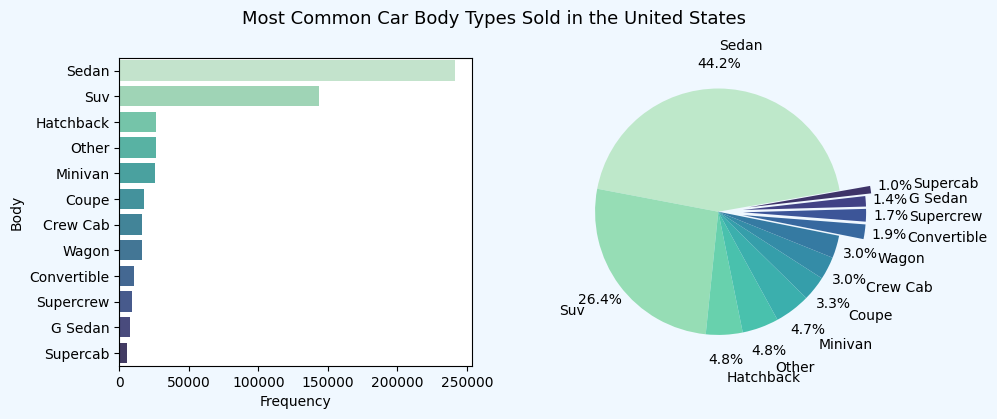

In [15]:
# Creating figures for popular car bodies 
fig = plt.figure(facecolor = 'aliceblue', figsize = (10, 4))
plt.suptitle('Most Common Car Body Types Sold in the United States', fontsize = 13, y = 1)

# Plotting bar chart 
plt.subplot(1,2,1)
sns.barplot(x = car_bodies.Count, y = car_bodies.Body, palette = sns.color_palette("mako_r", 15))
plt.xlabel('Frequency')

# Plotting pie chart
plt.subplot(1,2,2)
plt.pie(x = car_bodies.Count, labels = car_bodies.Body, autopct = '%1.1f%%', colors = sns.color_palette("mako_r", 15),
       pctdistance = 1.2 , labeldistance = 1.35, startangle = 10, explode = [0,0,0,0,0,0,0,0,0.2,0.2,0.2,0.25])
plt.show()

The most popular car body in the U.S is clearly the Sedan according to the figures above. Nearly 45% of car purchases are Sedans followed by SUVs with approximately 26%. These two car body types accumulate to more than 70% of all car purchases. The rest of the car body types are more niche such as the Hatchback, Minivan, Coupe, Crew Cab and so on. 

## Data Question 2: Which car manufacturer is the most popular?

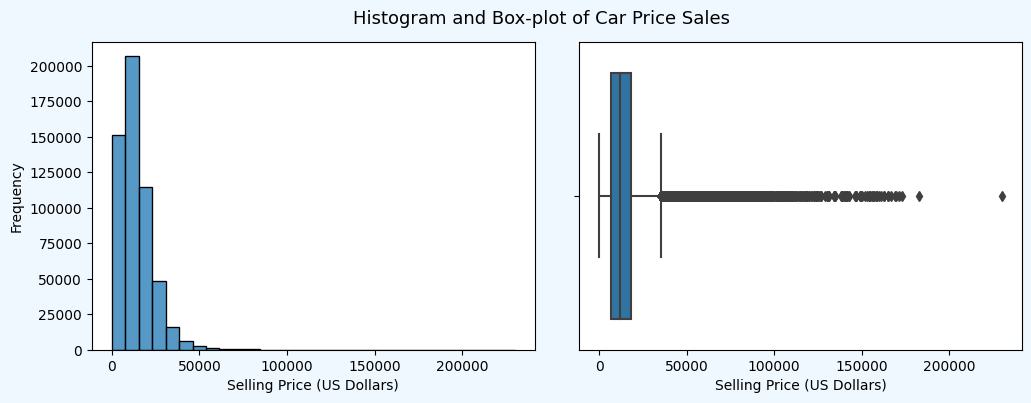

In [16]:
# Creating figures for selling price 
fig = plt.figure(facecolor = 'aliceblue', figsize = (12, 4))
plt.suptitle('Histogram and Box-plot of Car Price Sales', fontsize = 13, y = 0.96)
plt.subplots_adjust(hspace= 0.5, wspace = 0.1)

# Plotting histogram 
plt.subplot(1,2,1)
sns.histplot(data = sales, x = 'sellingprice', bins = 30)
plt.xlabel('Selling Price (US Dollars)')
plt.ylabel('Frequency')

# Plotting boxplot
plt.subplot(1,2,2)
sns.boxplot(data = sales, x = 'sellingprice')
plt.xlabel('Selling Price (US Dollars)')
plt.show()

The price range of cars sold in the U.S widely spans between 100 dollars to over 200 thousand dollars from 1984 to 2015. However, from the histogram graph on the left, it seems that it is rightly skewed. Hence, there are a lot of outliers above the price range of 40 thousand dollars. A large portion of cars (over 2 million cars) are sold around 20 thousand dollars. The number of cars above this price decreases drastically and reaches below 100 after 50 thousand dollars.

In [53]:
# Inital manufacturer/brand count and sum of selling price for each brand
manu = sales.make.value_counts().rename_axis('Brand').reset_index(name = 'Count')
manu_sales = sales.groupby('make').sellingprice.sum().sort_values(ascending = False).rename_axis('Brand').reset_index(name = 'Count')
manu

,Brand,Count
0,Ford,93554
1,Chevrolet,60197
2,Nissan,53946
3,Toyota,39871
4,Dodge,30710
...,...,...
91,airstream,1
92,ford tk,1
93,chev truck,1
94,hyundai tk,1


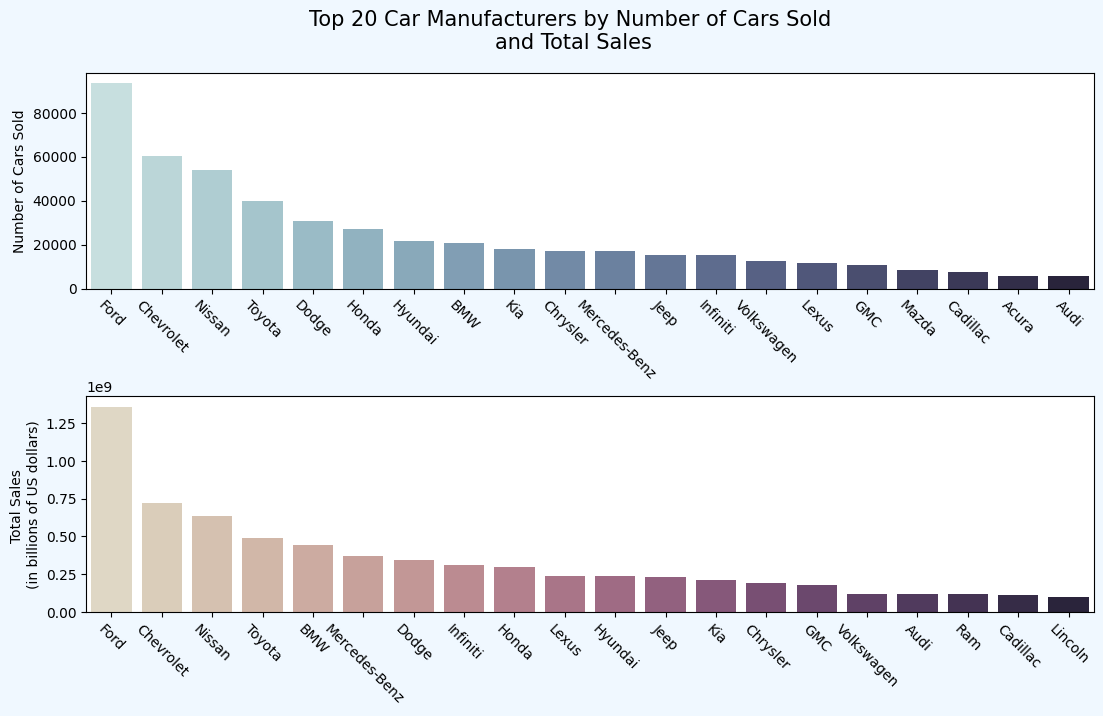

In [18]:
# Creating figures for popular car brands and their total sales
fig = plt.figure(facecolor = 'aliceblue', figsize = (13, 7))
plt.suptitle('Top 20 Car Manufacturers by Number of Cars Sold \nand Total Sales', fontsize = 15, y = 0.97)
plt.subplots_adjust(hspace= 0.5, wspace = 0.1)

# Plotting bar chart for popular car brands by number of sales
plt.subplot(2,1,1)
sns.barplot(y = manu.Count[0:20], x = manu.Brand[0:20], palette = sns.color_palette("ch:start=.2,rot=-.3", 20))
plt.ylabel('Number of Cars Sold')
plt.xlabel('')
plt.xticks(rotation = -45)

# Plotting bar chart for total sales for popular car brands
plt.subplot(2,1,2)
sns.barplot(y = manu_sales.Count[0:20], x = manu_sales.Brand[0:20], palette = sns.color_palette("ch:s=-.2,r=.6", 20))
plt.ylabel('Total Sales \n(in billions of US dollars)')
plt.xticks(rotation = -45)
plt.xlabel('')
plt.show()

Ford is the top selling car manufacturer in the United States by far. They have sold over 80000 cars and have earned a total sales of approximately 1.3 billion dollars between 1984 and 2015. Chevrolet comes in second with close to 60000 cars sold and a total sales of approximately 750 million dollars. It is important to note that BMW and Mercedes-Benz have a high total sales despite the number of cars sold. This could be due to the price range of their cars considering that their vehicles tend to be more luxurious. 

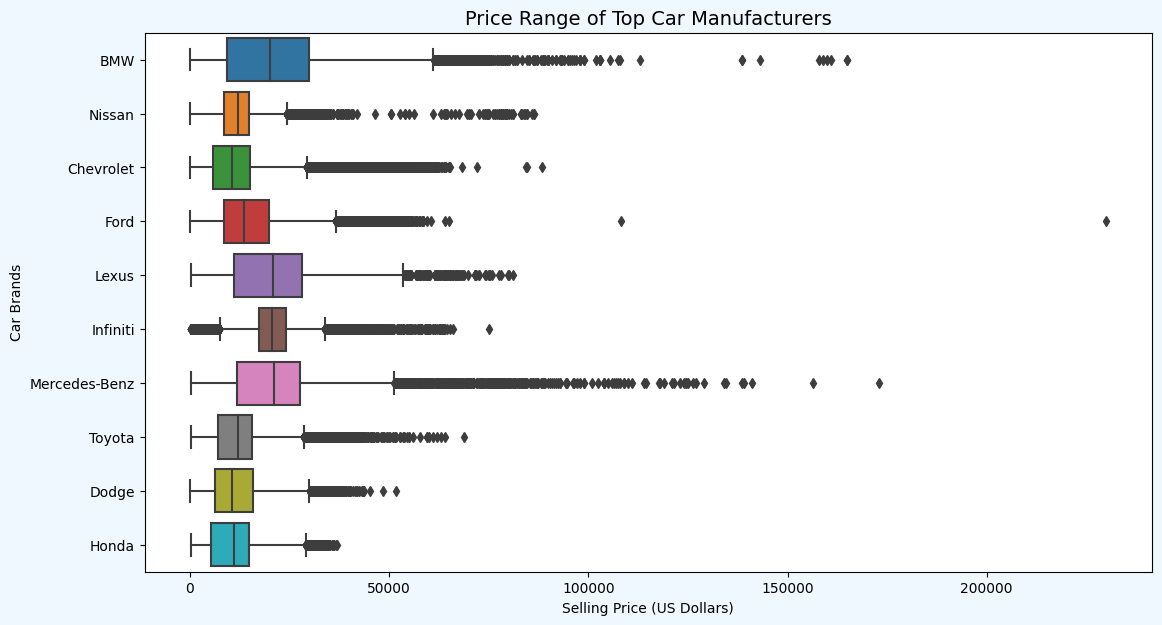

In [68]:
# Dataframe of top 10 car manufacturers
manu_box = sales[sales.make.isin(manu_sales.Brand[0:10])]

# Plotting box-plots for car prices for top car brands
fig = plt.figure(facecolor = 'aliceblue', figsize = (13, 7))
sns.boxplot(data = manu_box, y = 'make', x = 'sellingprice')
plt.title('Price Range of Top Car Manufacturers', fontsize = 14)
plt.xlabel('Selling Price (US Dollars)')
plt.ylabel('Car Brands')
plt.show()

It can be seen from the figure above that there are a lot of outliers for each car brand. However, if we ignore these outliers, BMW has one of the highest price range among the rest with around 70 thousand dollars. Lexus and Mercedes-Benz also have a relatively high price range, reaching around 60 thousand dollars. Among the top 10 car brands, Nissan has the smallest price range. 

## Data Question 3: Which US states have the most car sales?

In [19]:
# Initial state count and sum of sales for each state
states = sales.state.value_counts().rename_axis('State').reset_index(name = 'Count')
states_sales = sales.groupby('state').sellingprice.sum().sort_values(ascending = False).rename_axis('State').reset_index(name = 'Sales')

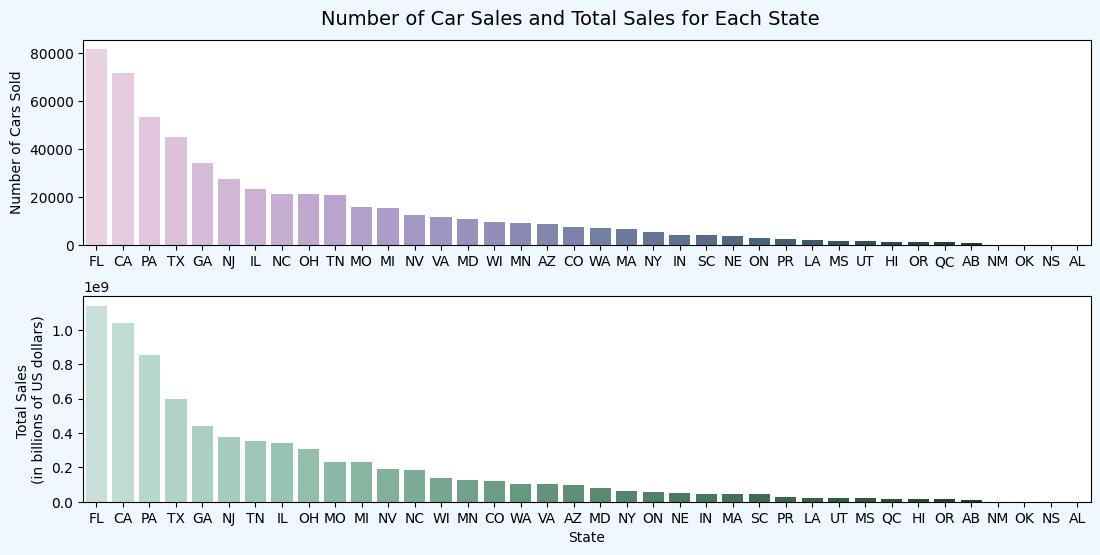

In [20]:
# Creating figures for states count and sales
fig = plt.figure(facecolor = 'aliceblue', figsize = (13, 6))
plt.suptitle('Number of Car Sales and Total Sales for Each State', fontsize = 14, y = 0.93)
plt.subplots_adjust(hspace= 0.25, wspace = 0.1)

# Plotting bar chart for top states by number of cars sold
plt.subplot(2,1,1)
sns.barplot(data = states, x = 'State', y = 'Count', palette= sns.color_palette("ch:s=2,r=.6", 37))
plt.xlabel('')
plt.ylabel('Number of Cars Sold')

# Plotting bar chart for states with the highest car sales
plt.subplot(2,1,2)
sns.barplot(data = states_sales, x = 'State', y = 'Sales', palette= sns.color_palette("ch:s=8,r=.1", 37))
plt.ylabel('Total Sales \n(in billions of US dollars)')
plt.show()

Florida has the most highest total sales and number of cars sold with over 1 billion dollars and approximately 80 thousand cars sold. California and Pennysylvania have the second and third highest number of sales respectively.

## Data Question 4: How have car sales changed over the years?

In [21]:
# New DataFrame column for sales month
sales['sold_month'] = sales.saledate.str[4:7]

In [22]:
# Initial monthly sales count 
sales_month = sales.sold_month.value_counts()

# Combining months with less than 5000 counts into 'Other'
mask = sales.isin(sales_month[sales_month < 5000].index)
sales[mask] = 'Other'
monthly_sales = sales.sold_month.value_counts().rename_axis('Month').reset_index(name = 'Count')
monthly_sales

,Month,Count
0,Feb,159115
1,Jan,138734
2,Jun,98037
3,Dec,53431
4,May,51300
5,Mar,45197
6,Other,2684


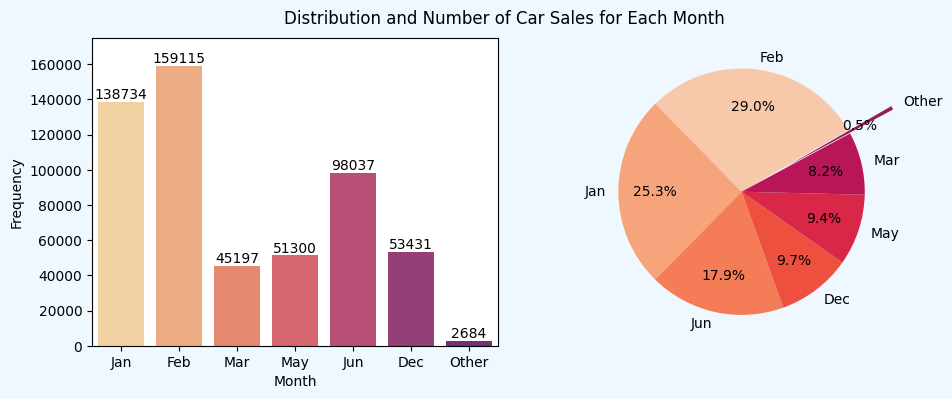

In [36]:
# Creating figures for car sales in each month 
fig = plt.figure(facecolor = 'aliceblue', figsize = (11, 4))
fig.suptitle("Distribution and Number of Car Sales for Each Month", y =0.95)
plt.subplots_adjust(wspace=0.1,hspace=0.2)

# Plotting bar chart for monthly car sales
plt.subplot(1,2,1)
ax = sns.barplot(x = monthly_sales.Month, y = monthly_sales.Count, order = ['Jan', 'Feb', 'Mar','May', 'Jun', 'Dec', 'Other'],
            palette = sns.color_palette("magma_r", 10))
ax.bar_label(ax.containers[0])
plt.ylabel('Frequency')
plt.ylim(0, 175000)

# Plotting pie chart for monthly car sales 
plt.subplot(1,2,2)
plt.pie(x = monthly_sales.Count, labels = monthly_sales.Month, autopct = '%1.1f%%', colors = sns.color_palette("rocket_r", 10),
       explode = [0,0,0,0,0,0,0.4], pctdistance = 0.7, startangle = 30)
plt.show()

February seems to be the most popular month for car purchases. Nearly 30% of cars in this dataset are sold in February, followed by January with 25% of cars. June has the third highest number of sales with nearly 100 thousand cars. (*Note: The data collected for this dataset may have inconsistent data that was collected at different times.*)

In [70]:
# Initial year count and sum of yearly sales 
year = sales.year.value_counts().sort_values().rename_axis('Year').reset_index(name = 'Count')
yearly_sales = sales.groupby('year').sellingprice.sum().rename_axis('Year').reset_index(name = 'Count')

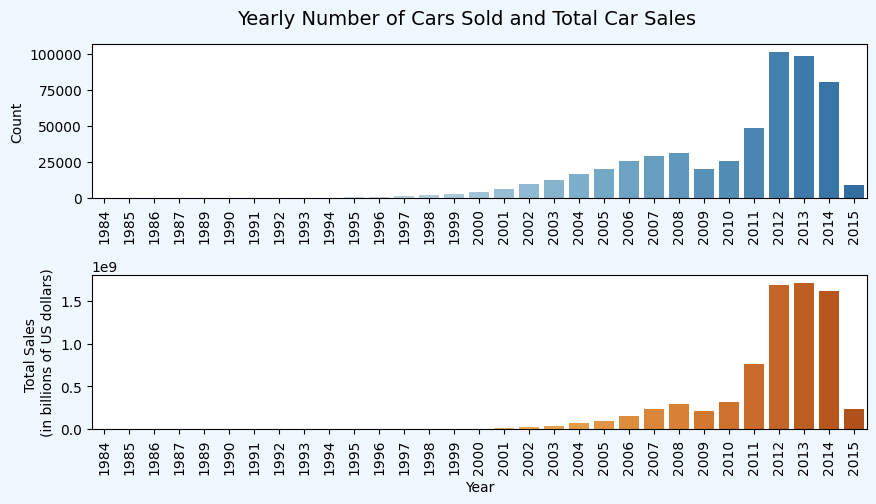

In [25]:
# Creating figures for yearly car sales
fig = plt.figure(facecolor = 'aliceblue', figsize = (10, 5))
fig.suptitle("Yearly Number of Cars Sold and Total Car Sales", y =0.95, fontsize = 14)
plt.subplots_adjust(wspace=1,hspace=0.5)

# Plotting bar chart for number of cars sold in each year
plt.subplot(2,1,1)
sns.barplot(data = year, x = 'Year', y = 'Count', palette = sns.color_palette("Blues", 40))
plt.xticks(rotation = 90)
plt.xlabel('')

# Plotting bar chart for car sales
plt.subplot(2,1,2)
sns.barplot(data = yearly_sales, x = 'Year', y = 'Count', palette = sns.color_palette("YlOrBr", 40))
plt.xticks(rotation = 90)
plt.ylabel('Total Sales \n(in billions of US dollars)')
plt.show()

There is a clear trend that can be seen from the figures above. Car sales are increasing gradually as the years go by. Between the period of 2012 and 2014, the number of cars sold and total car sales were at its highest, reaching a total car sales of over 1.5 billion dollars and over 75 thousand cars sold each year. In 2015, car sales is extremely low. This could be because data collection for this dataset had stopped around this period, hence there is insufficient data for accurate comparison for 2015. 

## Data Question 5: What colours and transmission type is the most popular?

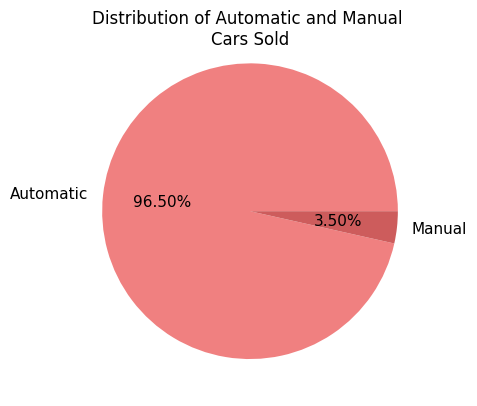

In [26]:
# Initial transmission count 
transmission = sales.transmission.value_counts().rename_axis('Transmission').reset_index(name = 'Count')

# Plotting pie chart
plt.pie(x = transmission.Count, labels = transmission.Transmission, colors = ['lightcoral', 'indianred'], autopct = '%1.2f%%', 
       textprops = {'fontsize':11})
plt.title('Distribution of Automatic and Manual \nCars Sold', y = .93)
plt.show()

Automatic cars have become very popular in recent years hence, it is unsurprising that over 95% of cars sold are automatic instead of manual cars. 

In [27]:
# Initial exterior color count 
colors = sales.color.value_counts()

# Combining colors with less than 7000 count into 'Other'
mask = sales.isin(colors[colors < 7000].index)
sales[mask] = 'Other'
colors = sales.color.value_counts().rename_axis('Color').reset_index(name = 'Count')
colors.head()

,Color,Count
0,Black,109148
1,White,104295
2,Silver,81872
3,Gray,81845
4,Blue,50061


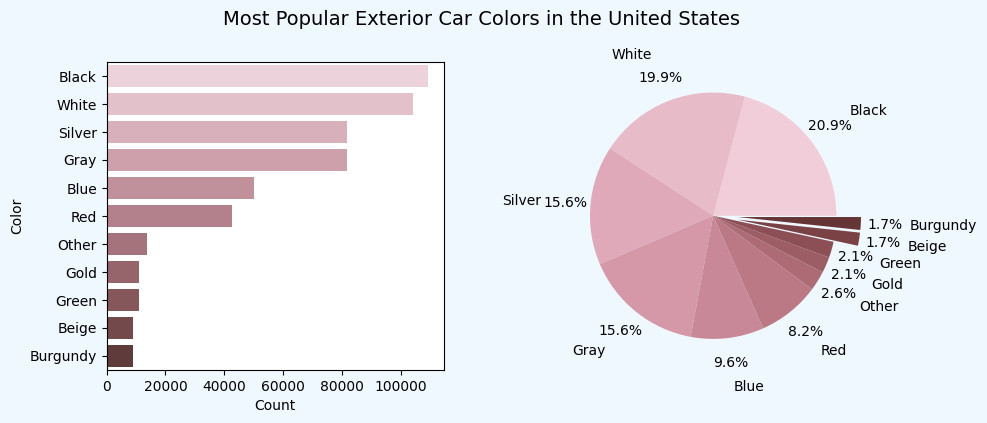

In [28]:
# Creating figures for popular exterior car colors
fig = plt.figure(facecolor = 'aliceblue', figsize = (10, 4))
fig.suptitle("Most Popular Exterior Car Colors in the United States", y = 1.01, fontsize = 14)
plt.subplots_adjust(wspace=0.3,hspace=0.2)

# Plotting bar chart 
plt.subplot(1,2,1)
sns.barplot(data = colors, y = 'Color', x = 'Count', palette = sns.color_palette("ch:start=4,rot=-.1", 13))

# Plotting pie chart 
plt.subplot(1,2,2)
plt.pie(x = colors.Count, labels = colors.Color, autopct = '%1.1f%%', pctdistance = 1.2, labeldistance = 1.4, explode = [0,0,0,0,0,0,0,0,0,0.2,0.2],
       colors = sns.color_palette("ch:start=4,rot=-.1", 13))
plt.show()

Black and white is the most popular exterior car colors overall, both accounting for around 20% of cars each. Silver and gray colors are the third most popular colors accounting for 15% each. 

In [29]:
# Initial initial car color count
interior = sales.interior.value_counts()

# Combining color group with less than 2000 counts into 'Other'
mask = sales.isin(interior[interior < 2000].index)
sales[mask] = 'Other'
interior = sales.interior.value_counts().rename_axis('Color').reset_index(name = 'Count')
interior

,Color,Count
0,Black,240940
1,Gray,174554
2,Beige,58603
3,Tan,43116
4,Other,13894


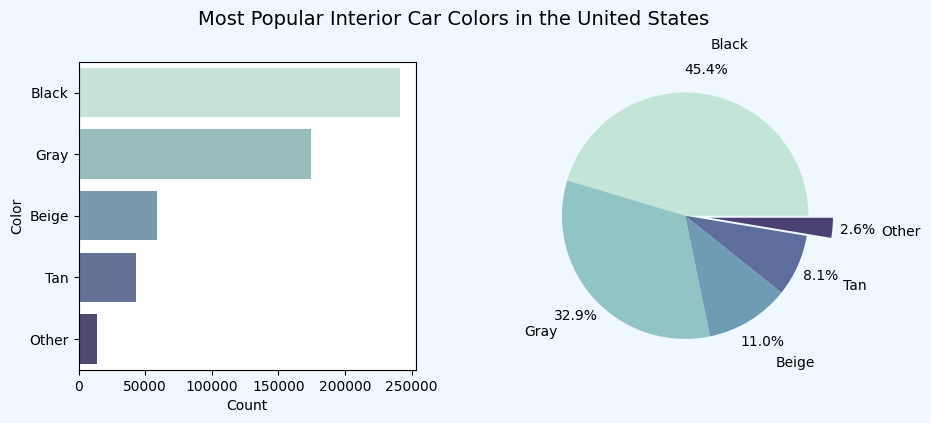

In [30]:
# Creating figures for popular interior car colors
fig = plt.figure(facecolor = 'aliceblue', figsize = (10, 4))
fig.suptitle("Most Popular Interior Car Colors in the United States", y = 1.01, fontsize = 14)
plt.subplots_adjust(wspace=0.3,hspace=0.2)

# Plotting bar chart
plt.subplot(1,2,1)
sns.barplot(data = interior, y = 'Color', x = 'Count', palette = sns.cubehelix_palette(start=.5, rot=-.5))

# Plotting pie chart 
plt.subplot(1,2,2)
plt.pie(x = interior.Count, labels = interior.Color, autopct = '%1.1f%%', pctdistance = 1.2, labeldistance = 1.4,
        colors = sns.cubehelix_palette(start=.5, rot=-.5), explode = [0,0,0,0,0.2])
plt.show()

For interior colors, black is the most popular with close to 2.5 million cars (45.4% of cars in this dataset), followed by gray with around 1.75 million cars.  

## Conclusion

The purpose of this project was to provide an insight into the vehicle industry to gain a better understanding on consumer preferences and market dynamics. From our analysis, we found that Sedans and SUVs are the most popular car body types for consumers. It was also found that Ford had the highest number of car sales and total sales from 1984 to 2015 even though BMW had one of the largest car price ranges. The state with the most car sales was Florida, followed by California and Pennysylvania. The number of cars sold have raised drastically over the years, reaching over 1.5 billion dollars in 2014. Lastly, black was the most popular colour for both the exterior and interior of a car. 